In [1]:
from matplotlib import pyplot as plt
import numpy as np

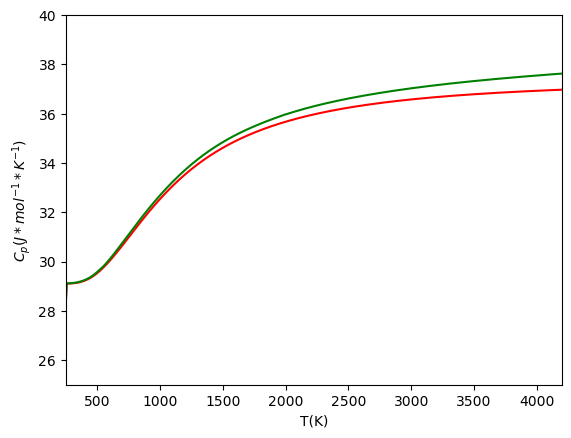

In [26]:
freq = np.empty(100, dtype=np.float64)
Cp = np.empty(1000, dtype=np.float64)
CpNIST = np.empty(1000, dtype=np.float64)
T = np.empty(1000, dtype=np.float64)

c=1
freq[0] = 2358.6 #N2 experimental frequency (cm^-1)

#c=3 # water
#freq[0] = 3756.0 #H2O antisymmetric stretch frequency (cm^-1)
#freq[1] = 3656.0 #H2O symmetric stretch frequency (cm^-1)
#freq[2] = 1595.0 #H2O bend frequency (cm^-1)


Na = 6.022e23
speed = 3.0e10
R = 8.3145
hbar = 6.62e-34/2./np.pi
K=1.38e-23
for j in range(1,1000):
    T[j]=j*6 + 250
    beta=1/(K*T[j])
    Cp[j]=3.5*R # N2 
    #Cp[j]=4*R # H2O 
    for i in range(0,c):
        #print("vibrational frequency ",i+1," is:  ",freq[i])
        nu = 2*np.pi*speed*freq[i] #omega frequency
        Cp[j]+=hbar*hbar*nu*nu*np.exp(-beta*hbar*nu)/(K*T[j]*T[j]*(1-np.exp(-beta*hbar*nu))**2)*Na
    #print ("Cp is", Cp[j], T[j])
    tt=T[j]/1000.
    if (T[j]<500):
        CpNIST[j]=28.98641 + 1.853978*tt - 9.647459*tt*tt + 16.63537*tt*tt*tt + 0.000117/tt/tt
    elif (T[j]<2000):
        CpNIST[j]=19.50583 + 19.88705*tt - 8.598535*tt*tt + 1.369784*tt*tt*tt + 0.527601/tt/tt
    else:
        CpNIST[j]=35.51872 + 1.128728*tt - 0.196103*tt*tt + 0.014662*tt*tt*tt - 4.55376/tt/tt
    
plt.plot(T,Cp,color='red')
plt.plot(T,CpNIST,color='green')
plt.xlabel('T(K)')
plt.ylabel('$C_p (J*mol^{-1}*K^{-1})$')
plt.xlim([250,4200])
plt.ylim([25,40])
plt.show()
